# Computational and Variational Methods for Inverse Problems
# Assignment 1

## Problem 1
#### a) Verify that the eigenvalues $\lambda_n$ and corresponding eigenfunctions $v_n$ of the continuous map $\mathbf{F}$ are given by:
$$\lambda_n = e^{-kT(\pi n/L)^2}$$,
$$v_n = \sqrt{\frac{2}{L}}sin\left(n\pi \frac{x}{L}\right)$$

#### b) Derive the expression for the eigenvalues and eigenvectors of the parameter-to-observable matrix $\mathbf{F}$ using the fact that the eigenvalues of $\mu_n$ of $\mathbf{K}$ are given by:

$$\mu_n = k\frac{4}{h^2}sin^2\left(\frac{\pi n}{2n_x}\right),   n = 1,2,...,n_x-1$$

#### and the jth component of the corresponding eigenvector $\mathbf{u_n}$ is given by

$$[u_n]_j = \sqrt{\frac{2}{L}}sin\left(\frac{n\pi jh}{L}\right),   n = 1,2,...,n_x-1$$

#### Solution: $\mathbf{F} = (\mathbf{I} + \Delta t\mathbf{K})^{-n_t}$. To find the solution to eigenvalues of $\mathbf{F}$, note that it will be tridiagonal since $\mathbf{K}$ is tridiagonal. Set up the following:

$$ \begin{align} Fx &= \lambda x \\ (I+\Delta tK)^{-n_t}x & = \lambda x \\ (I+\Delta tK)x&=\lambda^{n_t}x\\ \Delta tKx&=(\lambda^{n_t}-1)x\\Kx &= \frac{\lambda^{n_t}-1}{\Delta t}x\end{align} $$

$$.:\mu_n = \frac{\lambda^{n_t}-1}{\Delta t}$$

$$\lambda_n = (\mu_n\Delta t+1)^{-n_t}$$

#### c) Set L = 1, $n_x$ = 200, and $n_t$ = 100, and plot the decay of the eigenvalues of both the continuous (F) and the discrete ($\mathbf{F}$) parameter-to-obersvable maps as a function of n. Do this for the following values of kT: .0001, .001, .01, .1, 1.0 (on the same plot).

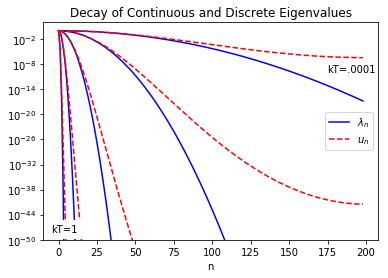

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Constants
L = 1.0 #length
nx = 200 #position partition
nt = 100 #time partition
h = L/nx 
kT = np.array([.0001,.001,.01,.1,1.])
n = np.arange(nx-1)

def ln(i,j): #Continuous eigenvalues
    return np.exp(-kT[i]*np.power(np.pi*j/L,2))
def un(i,j): #Eigenvaluesof P2O matrix
    return (4*kT[i]/h**2/nt*(np.sin(np.pi*j/2/nx))**2+1)**(-nt)

plt.semilogy(n, ln(0,n),'-b', n, ln(1,n),'-b', n, ln(2,n),'-b', n, ln(3,n),'-b', n, ln(4,n),'-b')
plt.semilogy(n, un(0,n),'--r', n, un(1,n),'--r', n, un(2,n),'--r', n, un(3,n),'--r', n, un(4,n),'--r')
plt.title('Decay of Continuous and Discrete Eigenvalues')
plt.xlabel('n')
blue = mlines.Line2D([],[],color='blue', label='$\lambda_n$')
red = mlines.Line2D([],[],color='red',linestyle='--', label='$u_n$')
plt.legend(handles=[blue,red])
plt.text(-5,10**-48.2,r'kT=1',backgroundcolor='white')
plt.text(175,10**-10,r'kT=.0001')
plt.ylim(10**(-50),100)
plt.show()

#### d) Set $L=1$, $k=0.01$, and $T=0.1$; plot the decay of the discrete eigenvalues as a function of $n$ for different resolutions in the space and time discretization. Use $(n_x,n_t) = (20,20),(40,40),(80,80),(160,160)$. What do you observe as you increase the resolution?

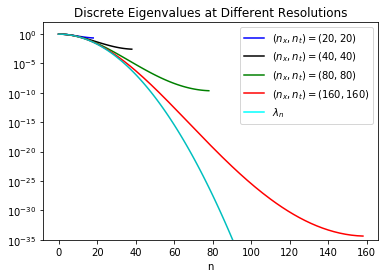

In [2]:
L = 1
k = 0.01
T = 0.1
def un(n):
    h = L/n
    nxt = np.arange(n-1)
    return (4*k*T/h**2/n*(np.sin(np.pi*nxt/2/n))**2+1)**(-n)

plt.semilogy(np.arange(19),un(20),'-b')
plt.semilogy(np.arange(39),un(40),'-k')
plt.semilogy(np.arange(79),un(80),'-g')
plt.semilogy(np.arange(159),un(160),'-r')
plt.semilogy(np.arange(100),np.exp(-k*T*np.power(np.pi*np.arange(100)/L,2)),'-c')
plt.title('Discrete Eigenvalues at Different Resolutions')
blue = mlines.Line2D([],[],color='blue', label='$(n_x,n_t)=(20,20)$')
black = mlines.Line2D([],[],color='black', label='$(n_x,n_t)=(40,40)$')
green = mlines.Line2D([],[],color='green', label='$(n_x,n_t)=(80,80)$')
red = mlines.Line2D([],[],color='red', label='$(n_x,n_t)=(160,160)$')
cyan = mlines.Line2D([],[],color='cyan', label='$\lambda_n$')
plt.xlabel('n')
plt.ylim(10**-35,100)
plt.legend(handles=[blue,black,green,red,cyan])
plt.show()

## Problem 2
### Consider the same inverse heat equation as in Problem 1. For the initial condition, use the discrete version of the true initial temperature profile,
$$m_{true} = max(0,1-|1-4x|)+100x^{10}(1-x)^2$$

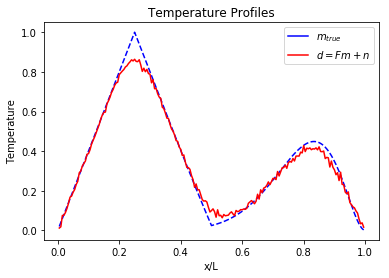

In [3]:
import scipy.linalg as la
import numpy.linalg as na

#Similar constants but with noise
nx = 200
nt = 100
L = 1.
T = .1
k = 0.01
h = L/nx
dt = T/nt
noise_std_dev = 1e-2

#Create the F matrix, starting with the discretized diffusion
#operator K (a tridiagonal matrix)
kcol = [2, -1]
kcol.extend(np.zeros(nx-3))
K = k/h**2*la.toeplitz(kcol,kcol)
F = na.matrix_power((np.identity(nx-1)+dt*K),-nt)

#The true initial temperature profile
x = np.arange(1,nx,dtype=np.float64)*h
m_true = np.maximum(np.zeros_like(x),1.-np.abs(1.-4.*x))\
    +100.*np.power(x,10)*np.power(1.-x,2)
u_true = np.dot(F,m_true)
noise = noise_std_dev*np.random.randn(u_true.shape[0])
d = u_true + noise

plt.plot(x,m_true,'--b')
plt.plot(x,d,'-r')
plt.title('Temperature Profiles')
blue = mlines.Line2D([],[],color='blue', label='$m_{true}$')
red = mlines.Line2D([],[],color='red', label='$d=Fm+n $')
plt.xlabel('x/L')
plt.ylabel('Temperature')
plt.legend(handles=[blue,red])
plt.show()

#### a) Use TSVD with $\alpha = 0.0001,0.001,0.01,0.1,1$ to compute the regularized reconstructions $m_\alpha^{TSVD}$

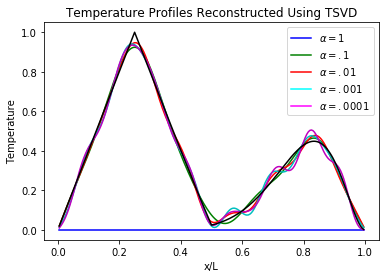

In [4]:
alpha = [10**(-i) for i in range(0,5,1)]
U, s, V = na.svd(F, full_matrices=True) #eigenvalues and left/right singular eigenvectors
s1 = np.zeros((len(alpha),s.shape[0])) #take vector with zeros and add eigenvalues later according to alpha
mtsvd = np.zeros(s1.shape)

for i in range(len(alpha)):
    s1[i][s >= np.sqrt(alpha[i])] = s[s >= np.sqrt(alpha[i])]**(-1) #take inverse of eigenvalues greater than alpha
    mtsvd[i][:] = np.dot(V.T,np.dot(np.diag(s1[i][:]),np.dot(U.T,d))) #Calculate m using eigenvalues greater than alpha
plt.plot(x,mtsvd[0][:],'b')
plt.plot(x,mtsvd[1][:],'g')
plt.plot(x,mtsvd[2][:],'r')
plt.plot(x,mtsvd[3][:],'c')
plt.plot(x,mtsvd[4][:],'m')
plt.plot(x,m_true,'k')
plt.title('Temperature Profiles Reconstructed Using TSVD')
plt.xlabel('x/L')
plt.ylabel('Temperature')
blue = mlines.Line2D([],[],color='blue', label=r'$\alpha = 1$')
green = mlines.Line2D([],[],color='green', label=r'$\alpha = .1 $')
red = mlines.Line2D([],[],color='red', label=r'$\alpha = .01$')
cyan = mlines.Line2D([],[],color='cyan', label=r'$\alpha = .001 $')
magenta = mlines.Line2D([],[],color='magenta', label=r'$\alpha = .0001$')
plt.legend(handles=[blue,green,red,cyan,magenta])
plt.show()

#### b) Use the Tikhonov filter with the same values for α for the reconstructions $m_a^{Tikh}$

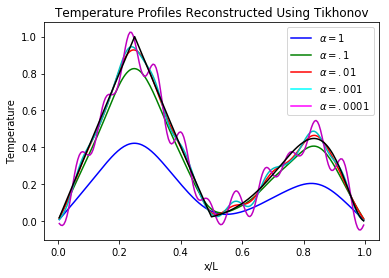

In [5]:
s2 = np.zeros((len(alpha),s.shape[0])) #Similar to above
mtikh = np.zeros(s2.shape)

for i in range(len(alpha)):
    s2[i][:] = s/(s*s+alpha[i]) #Tikhonov filtering
    mtikh[i][:] = np.dot(V.T,np.dot(np.diag(s2[i][:]),np.dot(U.T,d))) 

plt.plot(x,mtikh[0][:],'b')
plt.plot(x,mtikh[1][:],'g')
plt.plot(x,mtikh[2][:],'r')
plt.plot(x,mtikh[3][:],'c')
plt.plot(x,mtikh[4][:],'m')
plt.plot(x,m_true,'k')
blue = mlines.Line2D([],[],color='blue', label=r'$\alpha = 1$')
green = mlines.Line2D([],[],color='green', label=r'$\alpha = .1 $')
red = mlines.Line2D([],[],color='red', label=r'$\alpha = .01$')
cyan = mlines.Line2D([],[],color='cyan', label=r'$\alpha = .001 $')
magenta = mlines.Line2D([],[],color='magenta', label=r'$\alpha = .0001$')
plt.legend(handles=[blue,green,red,cyan,magenta])
plt.title('Temperature Profiles Reconstructed Using Tikhonov')
plt.xlabel('x/L')
plt.ylabel('Temperature')
plt.show()

#### c) Determine the (approximate) optimal value of the regularization parameter $\alpha$ in the Tikhonov regularization using the L-curve criterion.
#### d) Determine the (approximate) optimal value of the regularization parameter $\alpha$ in the Tikhonov regularization using Morozov's discrepancy criterion, i.e., find the largest value of $\alpha$ such that $$||Fm_\alpha - d||\le \delta$$ where $\delta = ||noise||$ and $m_\alpha$ is the solution of the Tikhonov-regularized inverse problem with regularization parameter $\alpha$.

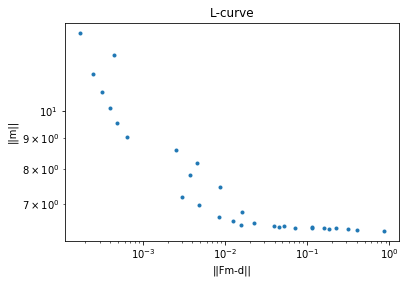

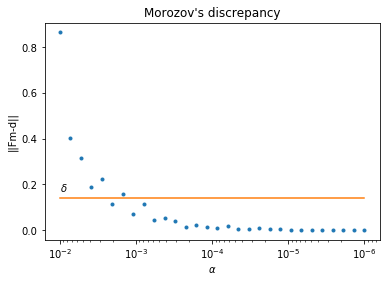

In [6]:
mag_m = np.zeros(len(alpha)) #vector for magnitude of solution m
mag_FMD = np.zeros(len(alpha)) #vector for Morozov
for i in range(len(alpha)):
    mag_m[i] = na.norm(mtikh[i][:],2)
    mag_FMD[i] = na.norm(np.dot(U,np.dot((np.diag((s*s+alpha[i])/s)),\
                         np.dot(V,mtikh[i][:])))-d,2)
plt.loglog(mag_FMD,mag_m,marker='.',linestyle=' ')
plt.title('L-curve')
plt.xlabel('||Fm-d||')
plt.ylabel('||m||')
plt.show()

plt.semilogx(alpha,mag_FMD, marker = '.',linestyle=' ')
plt.semilogx([alpha[0],alpha[-1]],[na.norm(noise,2),na.norm(noise,2)])
plt.gca().invert_xaxis()
plt.title('Morozov\'s discrepancy')
plt.xlabel(r'$\alpha$')
plt.ylabel('||Fm-d||')
plt.text(1e-2,.17,r'$\delta$')
plt.show()

#### e) Plot the $L_2$ norm error in the reconstruction, $||m_{true} - m_\alpha||$, as a function of $\alpha$, where $m_\alpha$ is the Tikhonov regularized solution. Which value of $\alpha$ (approximately) minimized this error? Compare the "optimal" values of $\alpha$ obtained in parts c, d, and e of this problem and comment on any differences.

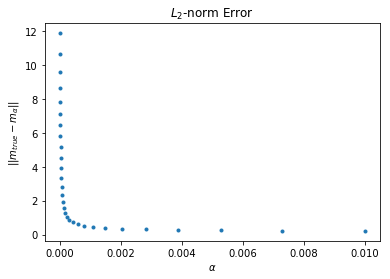

In [7]:
error = np.zeros(len(alpha))
for i in range(len(alpha)):
    error[i] = na.norm(m_true-mtikh[i][:])
plt.plot(alpha,error,marker='.',linestyle='')
plt.title(r'$L_2$-norm Error')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$||m_{true}-m_\alpha||$')
plt.show()

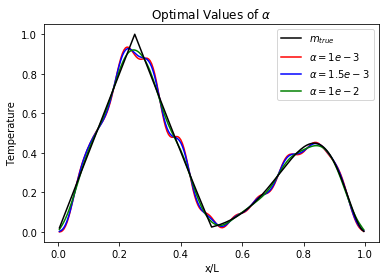

In [8]:
alpha = [1e-3,1.5e-3,.01] #Compare different alpha values
so = np.zeros((len(alpha),s.shape[0]))
mtikh2 = np.zeros(s2.shape)

for i in range(len(alpha)):
    so[i][:] = s/(s*s+alpha[i])
    mtikh2[i][:] = np.dot(V.T,np.dot(np.diag(so[i][:]),np.dot(U.T,d))) 
plt.plot(x,mtikh2[0][:],'r')
plt.plot(x,mtikh2[1][:],'b')
plt.plot(x,mtikh2[2][:],'g')
plt.plot(x,m_true,'k')
plt.title(r'Optimal Values of $\alpha$')
plt.xlabel('x/L')
plt.ylabel('Temperature')
black = mlines.Line2D([],[],color='black', label=r'$m_{true}$')
red = mlines.Line2D([],[],color='red', label=r'$\alpha=1e-3$')
blue = mlines.Line2D([],[],color='blue', label=r'$\alpha=1.5e-3$')
green = mlines.Line2D([],[],color='green', label=r'$\alpha=1e-2$')
plt.legend(handles=[black,red,blue,green])
plt.show()

# Problem 3

### Consider now inverse heat equation problem with adiabatic boundary conditions at the extremities of the rod:
$$\left. k\frac{\partial u}{\partial x}\right \rvert_{x=0} = \left. k\frac{\partial u}{\partial x}\right \rvert_{x=L} = 0 $$

### Use similar conditions as before, and as initlal condition use the true temperature profile:

$$m_{true} = x^2(1-x)^2(1+0.1sin(20\pi x))$$

#### a) Modify the code to prescribe the different type of boundary conditions. Numerically compute and plot the eigenvalues and eigenvectors of the discretized problem.

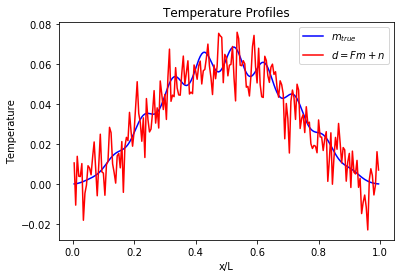

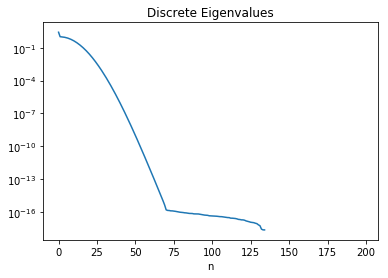

In [9]:
nx = 200
nt = 100
L = 1.
T = .1
k = 0.01
h = L/nx
dt = T/nt
noise_std_dev = 1e-2

kcol = [2, -1]
kcol.extend(np.zeros(nx-3))
K = k/h**2*la.toeplitz(kcol,kcol)
K[0,0] = -k/h
K[0,1] = k/h
K[-1,-1] = -k/h
K[-1,-2] = k/h
F2 = na.matrix_power((np.identity(nx-1)+dt*K),-nt)

x = np.arange(1,nx,dtype=np.float64)*h
m_true = x**2*(1-x)**2*(1+.1*np.sin(20*np.pi*x))
u_true = np.dot(F2,m_true)
noise = noise_std_dev*np.random.randn(u_true.shape[0])
d = u_true + noise
plt.plot(x,m_true,'-b')
plt.plot(x,d,'-r')
plt.title('Temperature Profiles')
blue = mlines.Line2D([],[],color='blue', label='$m_{true}$')
red = mlines.Line2D([],[],color='red', label='$d=Fm+n $')
plt.xlabel('x/L')
plt.ylabel('Temperature')
plt.legend(handles=[blue,red])
plt.show()

s,vec = na.eigh(F2)
s = s[::-1]
vec = vec[::-1]
plt.semilogy(np.arange(199),s)
plt.title('Discrete Eigenvalues')
plt.xlabel('n')
plt.show()

#### b) Determine the (approximately) optimal value of the regularization parameter $\alpha$ in the Tikhonov-regularized solution using the L-curve criterion.

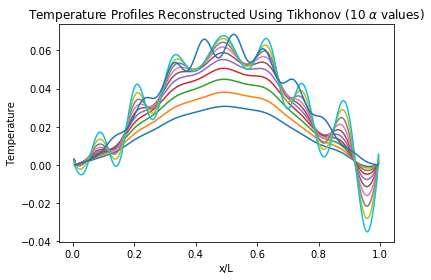

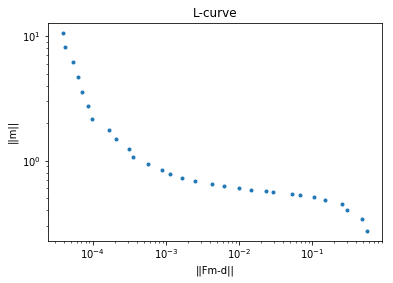

In [18]:
alpha = np.logspace(0,-6,num=30,base=10)#[10**(-i) for i in range(4,0,-1)]
U, s, V = na.svd(F2, full_matrices=True)
s2 = np.zeros((len(alpha),s.shape[0]))
mtikh = np.zeros(s2.shape)

for i in range(len(alpha)):
    s2[i][:] = s/(s*s+alpha[i])
    mtikh[i][:] = np.dot(V.T,np.dot(np.diag(s2[i][:]),np.dot(U.T,d))) 
for i in range(10):
    plt.plot(x,mtikh[i][:])
plt.plot(x,m_true)
plt.title(r'Temperature Profiles Reconstructed Using Tikhonov (10 $\alpha$ values)')
plt.xlabel('x/L')
plt.ylabel('Temperature')
plt.show()

mag_m = np.zeros(len(alpha))
mag_FMD = np.zeros(len(alpha))
for i in range(len(alpha)):
    mag_m[i] = na.norm(mtikh[i][:],2)
    mag_FMD[i] = na.norm(np.dot(U,np.dot((np.diag((s*s+alpha[i])/s)),\
                         np.dot(V,mtikh[i][:])))-d,2)
plt.loglog(mag_FMD,mag_m,marker='.',linestyle=' ')
plt.title('L-curve')
plt.xlabel('||Fm-d||')
plt.ylabel('||m||')
plt.show()


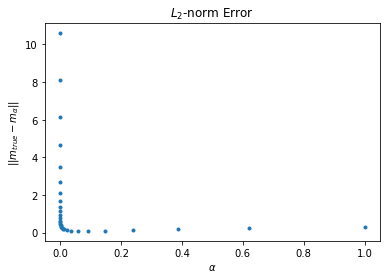

In [11]:
error = np.zeros(len(alpha))
for i in range(len(alpha)):
    error[i] = na.norm(m_true-mtikh[i][:])
plt.plot(alpha,error,marker='.',linestyle='')
plt.title(r'$L_2$-norm Error')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$||m_{true}-m_\alpha||$')
plt.show()

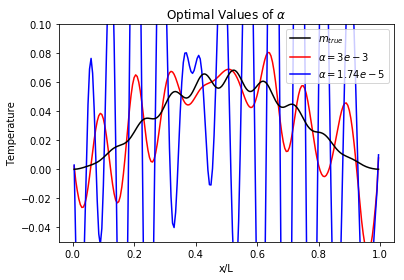

In [12]:
alpha = [3e-3,1.74e-5]
so = np.zeros((len(alpha),s.shape[0]))
mtikh2 = np.zeros(s2.shape)

for i in range(len(alpha)):
    so[i][:] = s/(s*s+alpha[i])
    mtikh2[i][:] = np.dot(V.T,np.dot(np.diag(so[i][:]),np.dot(U.T,d))) 
plt.plot(x,mtikh2[0][:],'r')
plt.plot(x,mtikh2[1][:],'b')
plt.plot(x,m_true,'k')
plt.title(r'Optimal Values of $\alpha$')
plt.xlabel('x/L')
plt.ylabel('Temperature')
black = mlines.Line2D([],[],color='black', label=r'$m_{true}$')
red = mlines.Line2D([],[],color='red', label=r'$\alpha=3e-3$')
blue = mlines.Line2D([],[],color='blue', label=r'$\alpha=1.74e-5$')
plt.legend(handles=[black,red,blue])
plt.ylim(-.05,.1)
plt.show()